# Analítica Avanzada de Datos.
---

 FECHA DE ENTREGA: **Miercoles 12 de Abril**

## Práctica 2. Regresión Lineal


 Utilizando el dataset *Air Quality Dataset* (AirQualityUCI.csv) y cuya descripción es la siguiente:

El dataset contiene **9357** instancias de respuestas promediadas cada hora de un conjunto de *5 sensores químicos* de óxido metálico integrados en un dispositivo multisensor químico de calidad del aire. El dispositivo estaba situado sobre el terreno en una zona significativamente contaminada, a nivel de carretera, dentro de una ciudad italiana. Los datos se registraron de marzo de 2004 a febrero de 2005 (un año), lo que representa el periodo más largo de registros disponibles de respuestas de dispositivos de sensores químicos de calidad del aire desplegados sobre el terreno. Las concentraciones medias horarias reales de CO, hidrocarburos no metánicos, benceno, óxidos de nitrógeno (NOx) y dióxido de nitrógeno (NO2) fueron proporcionadas por un analizador certificado de referencia situado en el mismo lugar. Existen evidencias de sensibilidades cruzadas, así como de desviaciones del concepto y del sensor, tal como se describe en De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (cita requerida) afectando eventualmente a las capacidades de estimación de concentración de los sensores. Los **valores perdidos** se marcan con el valor **-200**.

https://archive.ics.uci.edu/ml/datasets/Air+quality

Sus atributos son:

0. Fecha (DD/MM/AAAA)
1. Hora (HH.MM.SS)
2. Concentración media horaria real de CO en mg/m^3 (analizador de referencia)
3. Respuesta media horaria del sensor PT08.S1 (óxido de estaño) (nominalmente dirigido a CO)
4. Promedio horario real de la concentración total de hidrocarburos no metánicos en microg/m^3 (analizador de referencia)
5. Concentración media horaria real de benceno en microg/m^3 (analizador de referencia)
6. Respuesta media horaria del sensor PT08.S2 (titania) (objetivo nominal NMHC)
7. Concentración de NOx media horaria real en ppb (analizador de referencia)
8. PT08.S3 (óxido de tungsteno) respuesta media horaria del sensor (objetivo nominal NOx)
9. Concentración de NO2 real media horaria en microg/m^3 (analizador de referencia)
10. PT08.S4 (óxido de tungsteno) respuesta media horaria del sensor (objetivo nominal NO2)
11. PT08.S5 (óxido de indio) respuesta media horaria del sensor (objetivo nominal O3)
12. Temperatura en Â°C
13. Humedad relativa (%)
14. AH Humedad absoluta

Utilizando este Dataset y los modelos de regresión vistos en la unidad, contesta la siguiente pregunta:
- **¿En que horarios se tiene la mayor contaminación del aire?**

1. Debes analizar:
    - Si existen valores perdidos
    - Elegir las características más apropiadas
    - Calcular la correlación estadística

2. Con base en tu análisis previo, entrena el modelo de regresión (hold out 70% - 30%)
3. Evalua tu modelo entrenado calculando:
    - MSE
    - RMSE
    - R-squared
4. Escribe una breve conclusión de los resultados de tu análisis completo

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import copy
from collections import Counter
# Para la regresión lineal (simple y múltiple)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Para la regresion polinomial
from sklearn.preprocessing import PolynomialFeatures

In [2]:
air_data = pd.read_csv('AirQualityUCI.csv')
air_data.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18:00:00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19:00:00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20:00:00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21:00:00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22:00:00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  Unnamed: 15  Unnamed: 16  
0  13.6  48.9  0.7578          NaN          NaN  
1  13.3  47.7  0.7255          NaN          NaN  
2  11.9  54.0  0.7502          NaN          NaN  
3  11.0  60.0  0.7867          NaN          NaN  
4  11.2  59.6  0.7888          NaN          NaN

### Análisis de valores nulos

In [3]:
print(air_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB
None

In [4]:
# Identifica los valores nulos
print(air_data.isnull().sum())

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64


Observaciones: 

En este caso, con el conteo de registros nulos, se puede apreciar que hay una constante de 114 registros completamente vacíos en todos los campos. Se podría intentar reemplazar los registros por una medida de tendencia central o por el valor de los percentiles extremos, pero en el caso de la fecha, no hay forma de conocerla. A partir de lo anterior y tomando en cuenta que el volumen de registros es grande, 9471 registros, se decidió eliminar tales filas, ya que consideramos que prescindir de estos 114 registros no afectará el accuracy del modelo de regresión a calcular.

En el caso de las columnas con la totalidad de registros nulos, se decidió eliminarlas.

In [5]:
# Obtenemos los índices de los valores nulos
index_nans = air_data[air_data['Date'].isnull() == True].index.values
len(index_nans)

114

In [6]:
# Eliminamos las filas y columnas totalmente nulas
df = air_data.drop(index_nans)
df.drop(columns = ['Unnamed: 15', 'Unnamed: 16'], inplace = True)

In [7]:
# Verificamos que ya no existan valores nulos
print(df.isnull().sum())

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


### Manejo de outliers

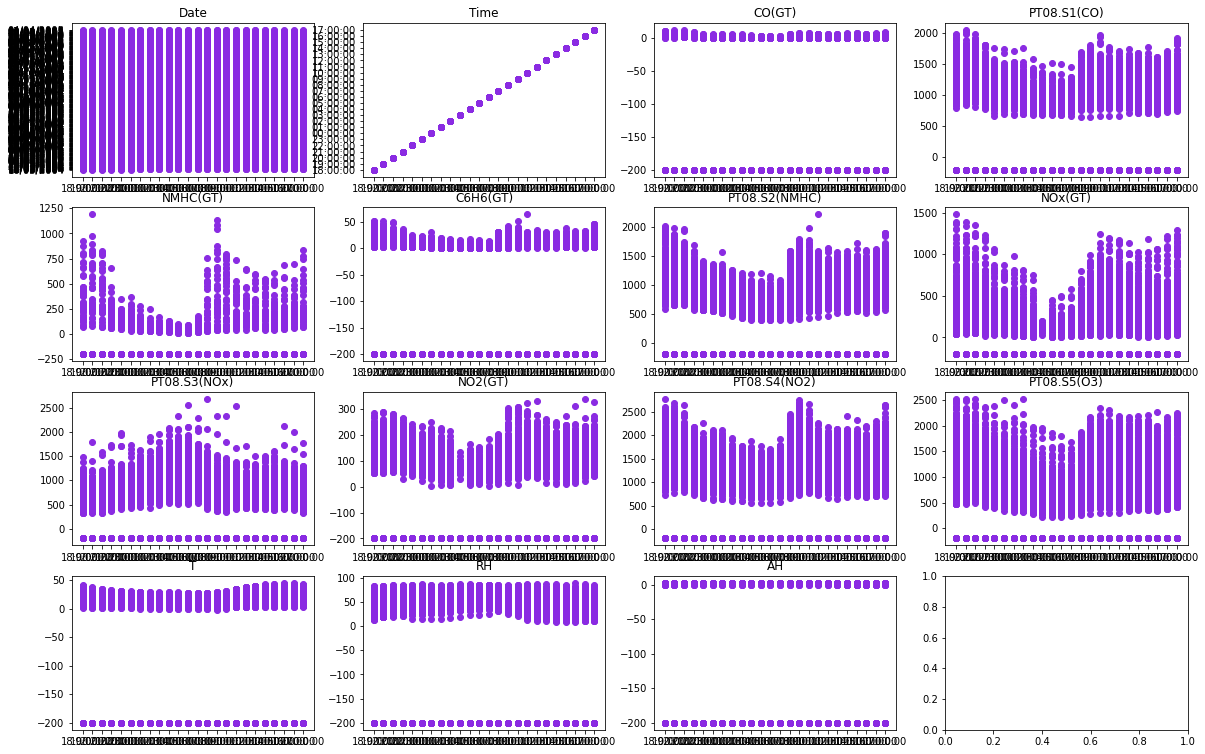

In [8]:
# Verificamos como se comportan los datos de cada columna
# Para desplegar todas las gráficas en un área común se define un número de filas y columnas para la malla de graficos
numeroFilas = 4
numeroColumnas = 4

# Se crea la figura de graficacion y el objeto ax con las especificaciones deseadas
fig, ax = plt.subplots(numeroFilas, numeroColumnas, figsize=(20,13))

# Se extrae el nombre de las características que componen el dataset
nombresCaracteristicas = df.columns

# Definimos el número de carcaterísticas que componen el dataset
numCaracteristicas = len(nombresCaracteristicas)

# Inicializamos un par de contadores para desplazarnos a lo largo de los ejes de la figura de graficación
numColumna = 0
numFila = 0

# Recorremos cada una de las filas y columnas de enfermedades mentales para verificar la correlación entre cada enfermedad
for actual in range(len(nombresCaracteristicas)):
    ax[numFila, numColumna].scatter(df.loc[:,'Time'], df.iloc[:,actual], c = 'blueviolet')
    nombreGrafico = f"{nombresCaracteristicas[actual]}" # Se construye el titulo del gráfico a partir llamando al conjunto de nombre con los índices correspondientes.
    ax[numFila, numColumna].set_title(nombreGrafico)
    #ax[numFila,numColumna].set_title(nombreGrafico) #Se despliega el título en el gráfico
    numColumna += 1 # Se aumenta el índice de la columna a graficar
    # Se verifica que el indice de la columna no rebase el número de columnas que hemos designado para la figura de gráfico
    # Si se alcanza el índice límite, se reinicia la ubicación de la posicion de las columnas y se aumenta el indice de las filas
    if(numColumna == numeroColumnas):
            numFila += 1
            numColumna = 0

plt.show()

Observaciones: A partir del análisis de los gráficos de dispersión, se puede observar que existen outliers. Por lo anterior, antes de conocer la correlación entre cada una de las características, se procederá a quitar los outliers para no afectar el índice de correlación, ni el modelo de regresión a calcular.

In [9]:
# Se define una funcion para conocer los outliers de cada caracteristica
def deteccionOutliers(df, nombreColumna):
    df[nombreColumna].plot(kind='box', title=f'{nombreColumna} - Outliers', figsize=(12,6), grid=True)
    plt.show()

    print("La media de los datos es: ", np.mean(df[nombreColumna].values))

    # Para saber los cuartiles. La funcion recibe como parametro una serie de pandas
    cuartiles = df[nombreColumna].quantile([0.25, 0.5, 0.75])
    cuartiles = np.array(cuartiles)

    columnaArray = np.array(df[nombreColumna])

    # Conocer cuáles son los valores outliers ligeros y cuáles son extremos
    mediana = cuartiles[1]
    IQ = cuartiles[-1]-cuartiles[0]
    # print(IQ)
    lif = cuartiles[0]-(1.5*IQ)
    uif = cuartiles[2]+(1.5*IQ)
    lof = cuartiles[0]-(3.0*IQ)
    uof = cuartiles[2]+(3.0*IQ)

    limitesOutliers = [lof, lif, uif, uof]

    print("Cuartiles: ", cuartiles)
    print("\nLimite inferior externo: ", lof)
    print("Limite inferior interno: ", lif)
    print("Limite superior interno: ", uif)
    print("Limite superior externo: ", uof)

    # Conocer los outliers
    outliersModerados = []
    outliersExtremos = []
    for dato in columnaArray:
        if (dato<lif and dato>lof) or (dato>uif and dato<uof):
            outliersModerados.append(dato)
        if(dato<lof) or (dato>uof):
            outliersExtremos.append(dato)

    print("\nOutliers moderados: ", outliersModerados)
    print("Outliers extremos: ", outliersExtremos)

    return limitesOutliers, cuartiles


Caracteristica: CO(GT)


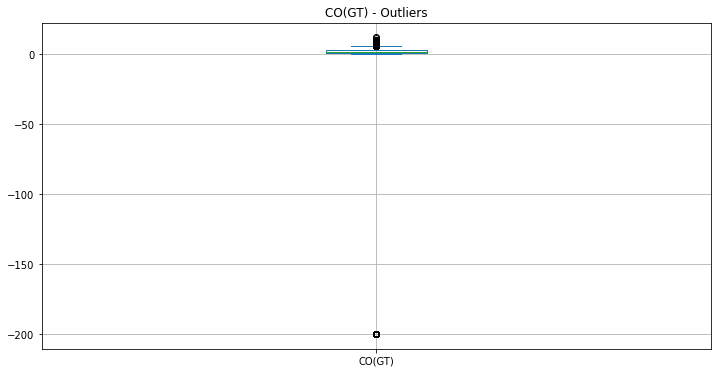

La media de los datos es:  -34.207523778989
Cuartiles:  [0.6 1.5 2.6]

Limite inferior externo:  -5.4
Limite inferior interno:  -2.4
Limite superior interno:  5.6
Limite superior externo:  8.6

Outliers moderados:  [6.9, 6.1, 6.6, 5.9, 8.1, 5.8, 6.1, 8.0, 6.5, 6.6, 7.6, 6.7, 5.7, 6.6, 6.2, 6.2, 6.2, 6.3, 5.9, 7.3, 6.1, 5.7, 6.4, 6.0, 7.2, 6.5, 5.7, 6.3, 5.9, 6.5, 6.2, 5.8, 6.4, 5.7, 5.8, 6.2, 6.1, 6.7, 5.7, 6.5, 7.3, 6.7, 7.5, 6.3, 6.5, 6.3, 5.7, 6.7, 7.0, 5.7, 8.0, 7.7, 6.8, 6.0, 6.0, 8.4, 6.8, 7.9, 8.4, 8.0, 6.4, 5.8, 8.4, 6.2, 6.5, 5.9, 6.6, 5.8, 7.5, 5.8, 5.9, 6.8, 7.9, 8.0, 5.9, 5.8, 6.2, 8.1, 8.0, 5.9, 6.6, 6.8, 7.8, 6.6, 5.9, 7.5, 7.2, 8.3, 6.3, 6.9, 6.5, 5.7, 6.6, 7.3, 7.3, 8.3, 6.1, 6.8, 8.4, 5.8, 6.2, 7.7, 6.4, 7.7, 8.1, 5.9, 6.3, 6.6, 6.3, 6.8, 5.7, 6.2, 7.5, 7.7, 7.8, 6.6, 6.0, 6.9, 6.1, 6.2, 6.3, 5.9, 6.9, 7.4, 7.4, 6.6, 7.3, 7.5, 6.3, 6.6, 8.5, 7.2, 6.1, 6.6, 6.5, 6.0, 6.9, 7.9, 6.1, 6.7, 6.8, 6.7, 6.4, 6.8, 5.9, 6.2, 5.9, 5.9, 5.7, 5.7, 5.9, 5.7, 5.8, 5.8, 5.8, 6.0, 5.7,

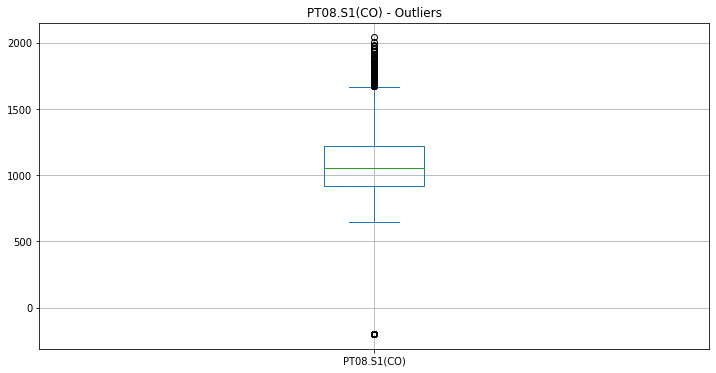

La media de los datos es:  1048.9900609169606
Cuartiles:  [ 921. 1053. 1221.]

Limite inferior externo:  21.0
Limite inferior interno:  471.0
Limite superior interno:  1671.0
Limite superior externo:  2121.0

Outliers moderados:  [1776.0, 1843.0, 1677.0, 1808.0, 1898.0, 1797.0, 1961.0, 1771.0, 1917.0, 2040.0, 1895.0, 1735.0, 1800.0, 1852.0, 1973.0, 1975.0, 1795.0, 1934.0, 1740.0, 1819.0, 1722.0, 1693.0, 1697.0, 1757.0, 1765.0, 1875.0, 1746.0, 1689.0, 1726.0, 1747.0, 1689.0, 1676.0, 1724.0, 1674.0, 1771.0, 1761.0, 1754.0, 1676.0, 1745.0, 1716.0, 1763.0, 1728.0, 1673.0, 1707.0, 1694.0, 1723.0, 1700.0, 1778.0, 1840.0, 1696.0, 1747.0, 1757.0, 1674.0, 1715.0, 1884.0, 1835.0, 1759.0, 1720.0, 1808.0, 1681.0, 1816.0, 1824.0, 1744.0, 1822.0, 1908.0, 1678.0, 1713.0, 1751.0, 1723.0, 1778.0, 1915.0, 1882.0, 1870.0, 1774.0, 1802.0, 1738.0, 1766.0, 1706.0, 1702.0, 1769.0, 1821.0, 1982.0, 2008.0, 1918.0, 1693.0, 1704.0, 1822.0, 1956.0, 1676.0, 1834.0, 1759.0, 1705.0, 1707.0, 1816.0, 1713.0, 1881.0, 1

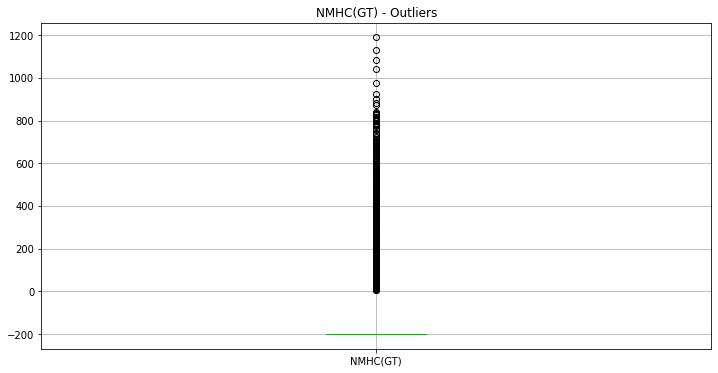

La media de los datos es:  -159.09009297851875
Cuartiles:  [-200. -200. -200.]

Limite inferior externo:  -200.0
Limite inferior interno:  -200.0
Limite superior interno:  -200.0
Limite superior externo:  -200.0

Outliers moderados:  []
Outliers extremos:  [150.0, 112.0, 88.0, 80.0, 51.0, 38.0, 31.0, 31.0, 24.0, 19.0, 14.0, 8.0, 16.0, 29.0, 64.0, 87.0, 77.0, 43.0, 61.0, 63.0, 164.0, 79.0, 95.0, 150.0, 307.0, 461.0, 401.0, 197.0, 61.0, 26.0, 55.0, 53.0, 40.0, 21.0, 10.0, 7.0, 17.0, 33.0, 202.0, 208.0, 166.0, 114.0, 140.0, 169.0, 185.0, 165.0, 133.0, 233.0, 242.0, 488.0, 333.0, 215.0, 367.0, 122.0, 67.0, 43.0, 46.0, 56.0, 30.0, 27.0, 47.0, 132.0, 239.0, 160.0, 283.0, 210.0, 154.0, 112.0, 108.0, 111.0, 97.0, 191.0, 258.0, 284.0, 269.0, 180.0, 116.0, 93.0, 131.0, 92.0, 132.0, 56.0, 32.0, 29.0, 27.0, 36.0, 57.0, 129.0, 148.0, 145.0, 93.0, 84.0, 99.0, 150.0, 156.0, 122.0, 262.0, 341.0, 214.0, 100.0, 79.0, 66.0, 73.0, 66.0, 44.0, 44.0, 39.0, 51.0, 107.0, 336.0, 618.0, 438.0, 334.0, 221.0, 207

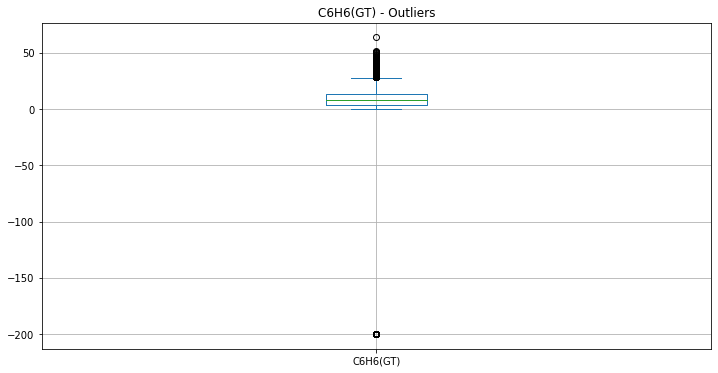

La media de los datos es:  1.8656834455487863
Cuartiles:  [ 4.   7.9 13.6]

Limite inferior externo:  -24.799999999999997
Limite inferior interno:  -10.399999999999999
Limite superior interno:  28.0
Limite superior externo:  42.4

Outliers moderados:  [32.6, 36.7, 32.1, 39.2, 31.0, 36.4, 38.4, 35.1, 35.8, 31.3, 31.9, 33.7, 29.1, 28.1, 33.7, 29.9, 40.3, 32.5, 33.6, 28.3, 35.0, 31.1, 30.6, 32.5, 30.4, 28.9, 28.3, 29.8, 36.2, 28.6, 32.6, 31.5, 35.2, 31.0, 29.9, 34.3, 37.4, 29.3, 29.1, 38.9, 36.7, 32.9, 28.2, 40.2, 34.4, 28.9, 36.1, 36.9, 30.4, 28.9, 30.2, 28.8, 30.2, 32.4, 33.5, 29.0, 31.0, 29.8, 30.0, 30.4, 37.3, 35.6, 30.7, 35.2, 30.0, 28.6, 34.5, 30.3, 34.5, 32.3, 28.3, 28.2, 32.1, 35.9, 32.1, 28.6, 31.8, 32.2, 28.8, 31.1, 34.9, 31.4, 41.2, 30.3, 28.7, 34.3, 29.0, 34.0, 29.4, 36.9, 39.3, 28.6, 31.0, 34.1, 36.3, 35.9, 34.0, 30.1, 29.4, 33.7, 30.3, 41.6, 30.8, 30.4, 31.9, 40.5, 41.6, 32.0, 31.0, 37.1, 28.8, 37.1, 35.7, 31.2, 29.5, 36.5, 38.8, 32.3, 29.3, 37.9, 30.1, 37.9, 28.1, 30.9, 40.

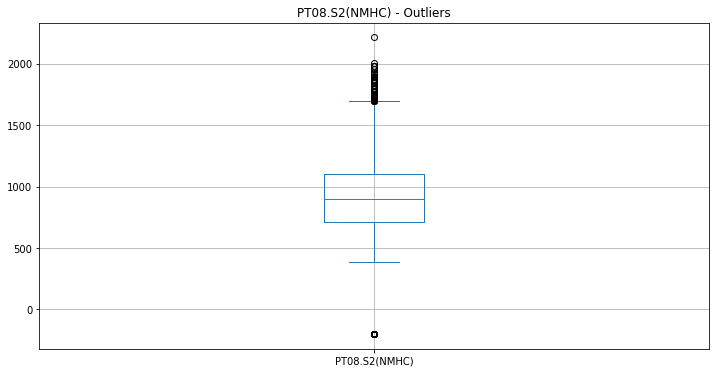

La media de los datos es:  894.5952762637597
Cuartiles:  [ 711.  895. 1105.]

Limite inferior externo:  -471.0
Limite inferior interno:  120.0
Limite superior interno:  1696.0
Limite superior externo:  2287.0

Outliers moderados:  [1701.0, 1754.0, 1737.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, 1776.0, 1716.0, 1748.0, 1701.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, 1776.0, 1705.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, 1713.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, 

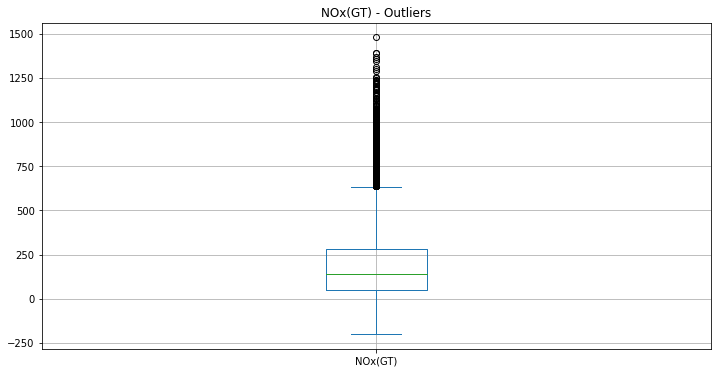

La media de los datos es:  168.6169712514695
Cuartiles:  [ 50. 141. 284.]

Limite inferior externo:  -652.0
Limite inferior interno:  -301.0
Limite superior interno:  635.0
Limite superior externo:  986.0

Outliers moderados:  [728.0, 891.0, 664.0, 737.0, 681.0, 699.0, 738.0, 665.0, 701.0, 684.0, 803.0, 799.0, 641.0, 667.0, 702.0, 755.0, 693.0, 669.0, 665.0, 693.0, 652.0, 895.0, 826.0, 648.0, 686.0, 649.0, 666.0, 814.0, 860.0, 820.0, 742.0, 688.0, 760.0, 918.0, 952.0, 685.0, 640.0, 736.0, 667.0, 677.0, 677.0, 761.0, 650.0, 706.0, 844.0, 667.0, 726.0, 674.0, 715.0, 789.0, 737.0, 859.0, 668.0, 683.0, 725.0, 658.0, 710.0, 852.0, 742.0, 758.0, 720.0, 678.0, 659.0, 706.0, 892.0, 839.0, 713.0, 648.0, 664.0, 878.0, 905.0, 808.0, 858.0, 839.0, 748.0, 729.0, 810.0, 870.0, 760.0, 691.0, 832.0, 881.0, 661.0, 870.0, 733.0, 846.0, 801.0, 884.0, 784.0, 896.0, 953.0, 980.0, 884.0, 650.0, 920.0, 980.0, 955.0, 933.0, 898.0, 866.0, 718.0, 715.0, 717.0, 803.0, 726.0, 732.0, 865.0, 936.0, 812.0, 773.0, 76

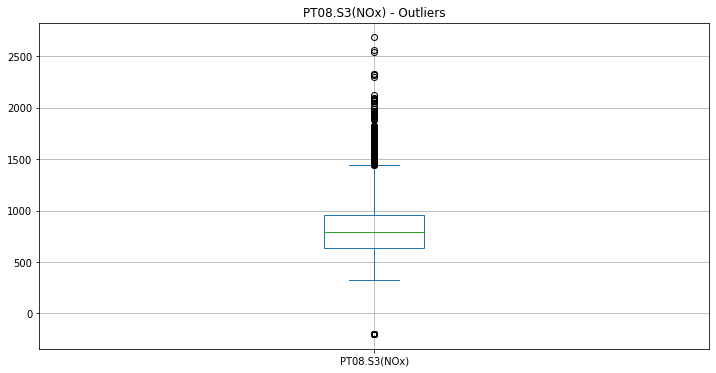

La media de los datos es:  794.9901677888212
Cuartiles:  [637. 794. 960.]

Limite inferior externo:  -332.0
Limite inferior interno:  152.5
Limite superior interno:  1444.5
Limite superior externo:  1929.0

Outliers moderados:  [1462.0, 1453.0, 1579.0, 1705.0, 1818.0, 1918.0, 1738.0, 1490.0, 1565.0, 1680.0, 1893.0, 1895.0, 1685.0, 1460.0, 1620.0, 1813.0, 1756.0, 1786.0, 1480.0, 1522.0, 1701.0, 1908.0, 1542.0, 1493.0, 1477.0, 1572.0, 1496.0, 1450.0, 1564.0, 1707.0, 1604.0, 1449.0, 1588.0, 1643.0, 1557.0, 1496.0, 1468.0, 1457.0, 1462.0, 1613.0, 1699.0, 1473.0, -200.0, -200.0, -200.0, 1456.0, 1536.0, 1475.0, 1749.0, 1826.0, 1705.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, 1452.0, 1474.0, 1615.0, 1448.0, 1452.0, 1822.0, 1923.0, 1756.0, 1613.0, 1453.0, 1499.0, 1581.0, 1482.0, 1565.0, 1587.0, 1523.0, 1535.0, 1783.0, 1718.0, 1496.0, 1476.0, 148

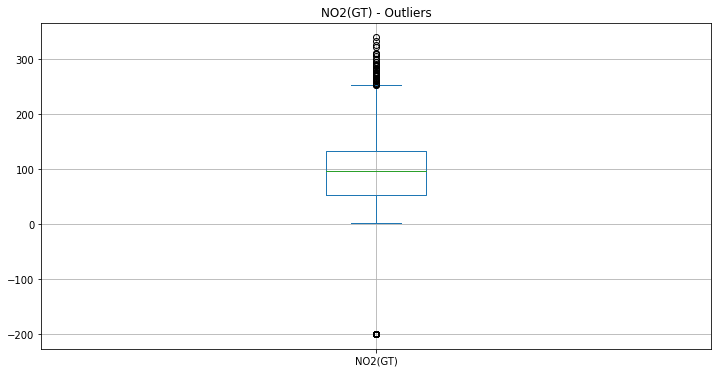

La media de los datos es:  58.14887250187026
Cuartiles:  [ 53.  96. 133.]

Limite inferior externo:  -187.0
Limite inferior interno:  -67.0
Limite superior interno:  253.0
Limite superior externo:  373.0

Outliers moderados:  [272.0, 288.0, 254.0, 267.0, 282.0, 278.0, 255.0, 269.0, 257.0, 272.0, 283.0, 256.0, 261.0, 270.0, 285.0, 282.0, 275.0, 309.0, 322.0, 333.0, 306.0, 301.0, 274.0, 283.0, 310.0, 281.0, 289.0, 276.0, 267.0, 296.0, 291.0, 276.0, 275.0, 312.0, 340.0, 326.0, 284.0, 289.0, 265.0, 262.0, 288.0, 260.0, 254.0, 283.0, 295.0, 255.0, 267.0, 269.0, 267.0, 262.0, 270.0, 260.0, 265.0, 262.0]
Outliers extremos:  [-200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0

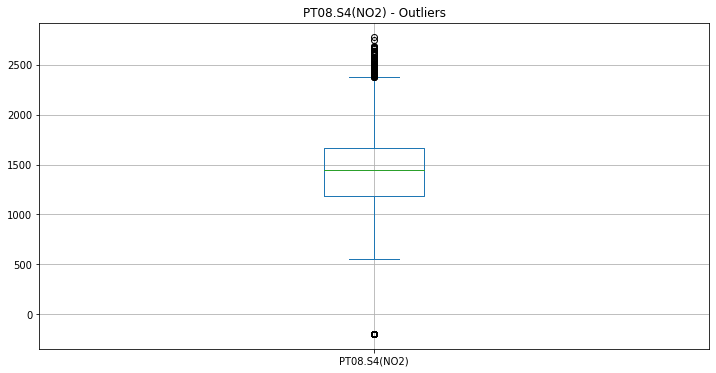

La media de los datos es:  1391.4796409105481
Cuartiles:  [1185. 1446. 1662.]

Limite inferior externo:  -246.0
Limite inferior interno:  469.5
Limite superior interno:  2377.5
Limite superior externo:  3093.0

Outliers moderados:  [2390.0, 2665.0, 2447.0, 2679.0, 2443.0, 2535.0, 2414.0, 2416.0, 2468.0, 2456.0, 2439.0, -200.0, -200.0, -200.0, 2560.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, 2446.0, 2396.0, 2684.0, 2417.0, 2396.0, 2405.0, 2572.0, 2488.0, 2400.0, 2459.0, 2617.0, 2423.0, 2667.0, 2413.0, 2605.0, 2545.0, 2503.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, 2486.0, 2746.0, 2691.0, 2525.0, 2397.0, 2530.0, 2385.0, 2450.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0,

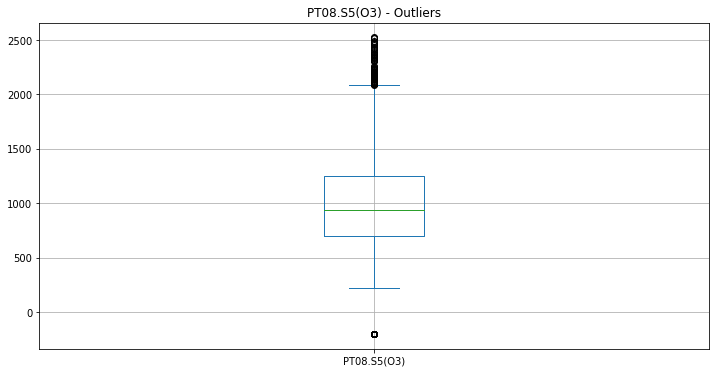

La media de los datos es:  975.0720316340708
Cuartiles:  [ 700.  942. 1255.]

Limite inferior externo:  -965.0
Limite inferior interno:  -132.5
Limite superior interno:  2087.5
Limite superior externo:  2920.0

Outliers moderados:  [2184.0, 2122.0, 2306.0, 2359.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, 2108.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, 2202.0, 2147.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, 2475.0, 2176.0, 2105.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0,

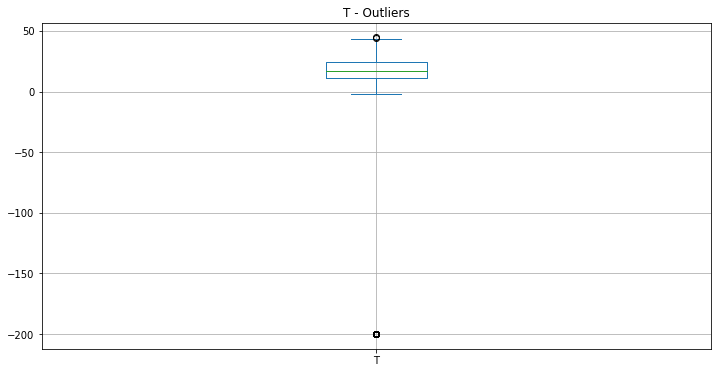

La media de los datos es:  9.778305012290264
Cuartiles:  [10.9 17.2 24.1]

Limite inferior externo:  -28.700000000000003
Limite inferior interno:  -8.9
Limite superior interno:  43.900000000000006
Limite superior externo:  63.7

Outliers moderados:  [44.3, 44.6]
Outliers extremos:  [-200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200

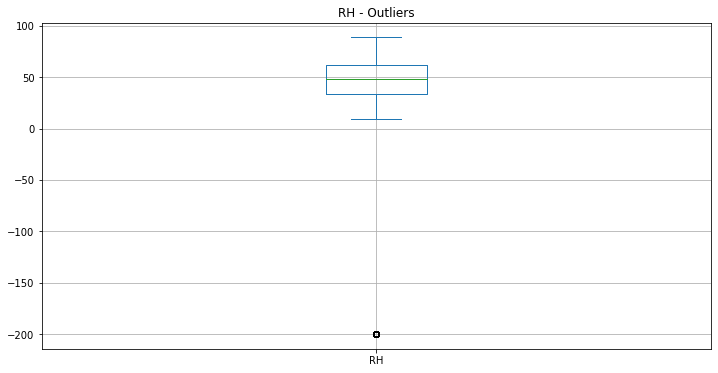

La media de los datos es:  39.48537992946458
Cuartiles:  [34.1 48.6 61.9]

Limite inferior externo:  -49.29999999999999
Limite inferior interno:  -7.599999999999994
Limite superior interno:  103.6
Limite superior externo:  145.29999999999998

Outliers moderados:  []
Outliers extremos:  [-200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, 

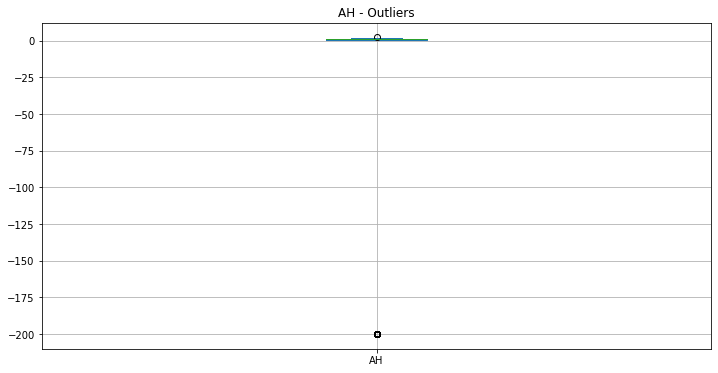

La media de los datos es:  -6.837603644330447
Cuartiles:  [0.6923 0.9768 1.2962]

Limite inferior externo:  -1.1194000000000002
Limite inferior interno:  -0.21355000000000002
Limite superior interno:  2.20205
Limite superior externo:  3.1079

Outliers moderados:  [2.231]
Outliers extremos:  [-200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -200.0, -20

In [10]:
# Los datos se trataran mediante el remplazo por el primer percentil y el 9 percentil
nombresCaracteristicas = df.columns[2:15]
PM1 = []
PM2_5 = []
PM10 = []
for nombre in nombresCaracteristicas:
    datos = df[nombre]
    print(f"\nCaracteristica: {nombre}")
    contador = 0
    # for nombre in nombresContaminantes:

    limitesOut, cuartiles = deteccionOutliers(df, nombre)
        
    indicePercetiles = np.array([10,20,30,40,50,60,70,80,90])
    caracteristica = np.array(datos)
    percentiles = np.percentile(caracteristica,indicePercetiles)
    print("Percentiles: ", list(enumerate(percentiles, 1)))

    df.loc[df[nombre] < limitesOut[1], nombre] = percentiles[0]
    df.loc[df[nombre] > limitesOut[2], nombre] = percentiles[-1]

    # Bloque de codigo para verificar que efectivamente se haya eliminado los outliers
    outliersModerados = []
    outliersExtremos = []
    for dato in datos: # features['PM1_0'].values:
        if (dato<limitesOut[1] and dato>limitesOut[0]) or (dato>limitesOut[2] and dato<limitesOut[3]):
            outliersModerados.append(dato)
        if(dato<limitesOut[0]) or (dato>limitesOut[3]):
            outliersExtremos.append(dato)
    print("Outliers moderados: ", outliersModerados)
    print("Outliers extremos: ", outliersExtremos)

### Conversion de la columna de fecha a una columna numérica

In [11]:
df_aux = copy.deepcopy(df)

In [12]:
hour = pd.to_numeric(df_aux.Time.str[:2])
hour

0       18
1       19
2       20
3       21
4       22
        ..
9352    10
9353    11
9354    12
9355    13
9356    14
Name: Time, Length: 9357, dtype: int64

In [13]:
df_aux['Time'] = hour

### ¿En qué horarios se tiene la mayor contaminación del aire?

In [14]:
# Extraemos los valores únicos de las fechas y tipos de contaminates
fechas = df_aux.Date.unique()
contaminantes = df_aux.columns[2:12]

# Conocemos las horas con mayor presencia de cada uno de los contaminantes
for contaminante in contaminantes:
    horasCO = []
    print(f"\nContaminante: {contaminante}")
    for fecha in fechas:
        # Filtramos el DataFrame por fecha
        aux = df_aux[df_aux['Date'] == fecha]
        # Filtramos el DataFrame a partir del valor maximo del contaminante en una hora especifica
        aux = aux[aux.loc[:,contaminante] == aux.loc[:,contaminante].max()]
        
        # Guardamos el tiempo en que se presentó el mayor registro del contaminante
        horasCO.append(aux['Time'].values[0])

    # Se hace un conteo de frecuencias de las horas con mayor presencia del contaminante
    freq = Counter(horasCO)
    sort_freq = freq.most_common() # Al ordenarlo se vuelve una lista
    # print(sort_freq)

    # convierte el objeto Counter en un DataFrame
    df_freq = pd.DataFrame(sort_freq, columns=['Hora', 'Frecuencia'])
    print(df_freq)


Contaminante: CO(GT)
    Hora  Frecuencia
0      0          68
1     19          58
2      8          47
3     20          40
4      9          35
5     18          34
6     21          17
7     10          15
8     17          15
9     23          12
10     7          10
11    22           8
12    11           8
13    16           8
14    13           4
15    14           4
16    15           3
17    12           2
18     1           2
19     2           1

Contaminante: PT08.S1(CO)
    Hora  Frecuencia
0      8          74
1     19          65
2     20          45
3      9          37
4      0          31
5     18          30
6      7          25
7     17          17
8     21          14
9     23          13
10    22           8
11    16           7
12    11           6
13    10           5
14    12           3
15    14           3
16    13           2
17     2           2
18     1           2
19    15           2

Contaminante: NMHC(GT)
   Hora  Frecuencia
0     0         390
1    

In [15]:
# Para conocer de manera general, en qué horas se presenta la mayor contaminación, se promedia el valor de cada contaminante en las diferentes horas 
# y se obtienen los máximos para cada contaminante
contaminantes = df_aux.columns[2:12]

# Se calcula la media de contaminante por hora
aux = df_aux.groupby('Time').mean().reset_index() 
#print(aux)
contaminantesList = []
horaMaxList = []

# Se recupera la hora promedio de maxima concentración de contaminante por día
for contaminante in contaminantes:
     c = aux[aux.loc[:,contaminante] == aux.loc[:,contaminante].max()]
     contaminantesList.append(contaminante)
     horaMaxList.append(c['Time'].values[0])

# Se da formato a los resultados y se imprimen
contaminantes_dict = {"Contaminantes": contaminantesList,
                      "Hora de máxima concentración": horaMaxList}

df_contaminante = pd.DataFrame(contaminantes_dict)
print(df_contaminante)

   Contaminantes  Hora de máxima concentración
0         CO(GT)                            19
1    PT08.S1(CO)                            19
2       NMHC(GT)                             0
3       C6H6(GT)                            19
4  PT08.S2(NMHC)                            19
5        NOx(GT)                            19
6   PT08.S3(NOx)                             4
7        NO2(GT)                            19
8   PT08.S4(NO2)                            19
9    PT08.S5(O3)                             9


Observaciones: Como se puede apreciar, la hora donde la calidad del aire se ve más comprometida es a las 19 horas.

### Correlación y selección de características

Se consulta la matriz de correlación para conocer cuáles son las características más correlacionadas con el tiempo a fin de integrarlas como posibles características a considerar en el modelo de regresión

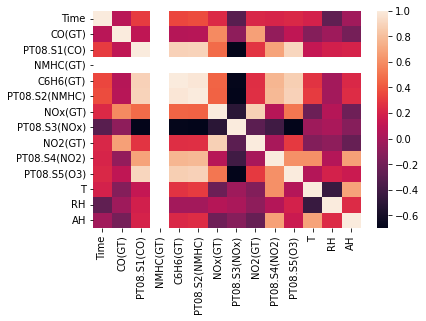

In [16]:
corr_matrix = df_aux.corr()
sns.heatmap(corr_matrix)
plt.show()

In [17]:
print(corr_matrix)

                   Time    CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
Time           1.000000  0.075332     0.308328       NaN  0.345187   
CO(GT)         0.075332  1.000000     0.099512       NaN  0.062171   
PT08.S1(CO)    0.308328  0.099512     1.000000       NaN  0.884376   
NMHC(GT)            NaN       NaN          NaN       NaN       NaN   
C6H6(GT)       0.345187  0.062171     0.884376       NaN  1.000000   
PT08.S2(NMHC)  0.367581  0.062947     0.892885       NaN  0.979208   
NOx(GT)        0.231003  0.583527     0.469481       NaN  0.445349   
PT08.S3(NOx)  -0.311048 -0.095394    -0.690130       NaN -0.687091   
NO2(GT)        0.219391  0.672570     0.281028       NaN  0.254951   
PT08.S4(NO2)   0.206950 -0.072983     0.686979       NaN  0.764617   
PT08.S5(O3)    0.226064  0.101609     0.900735       NaN  0.873029   
T              0.190187 -0.136043     0.121158       NaN  0.274187   
RH            -0.280357 -0.032753     0.178629       NaN -0.011635   
AH            -0.021

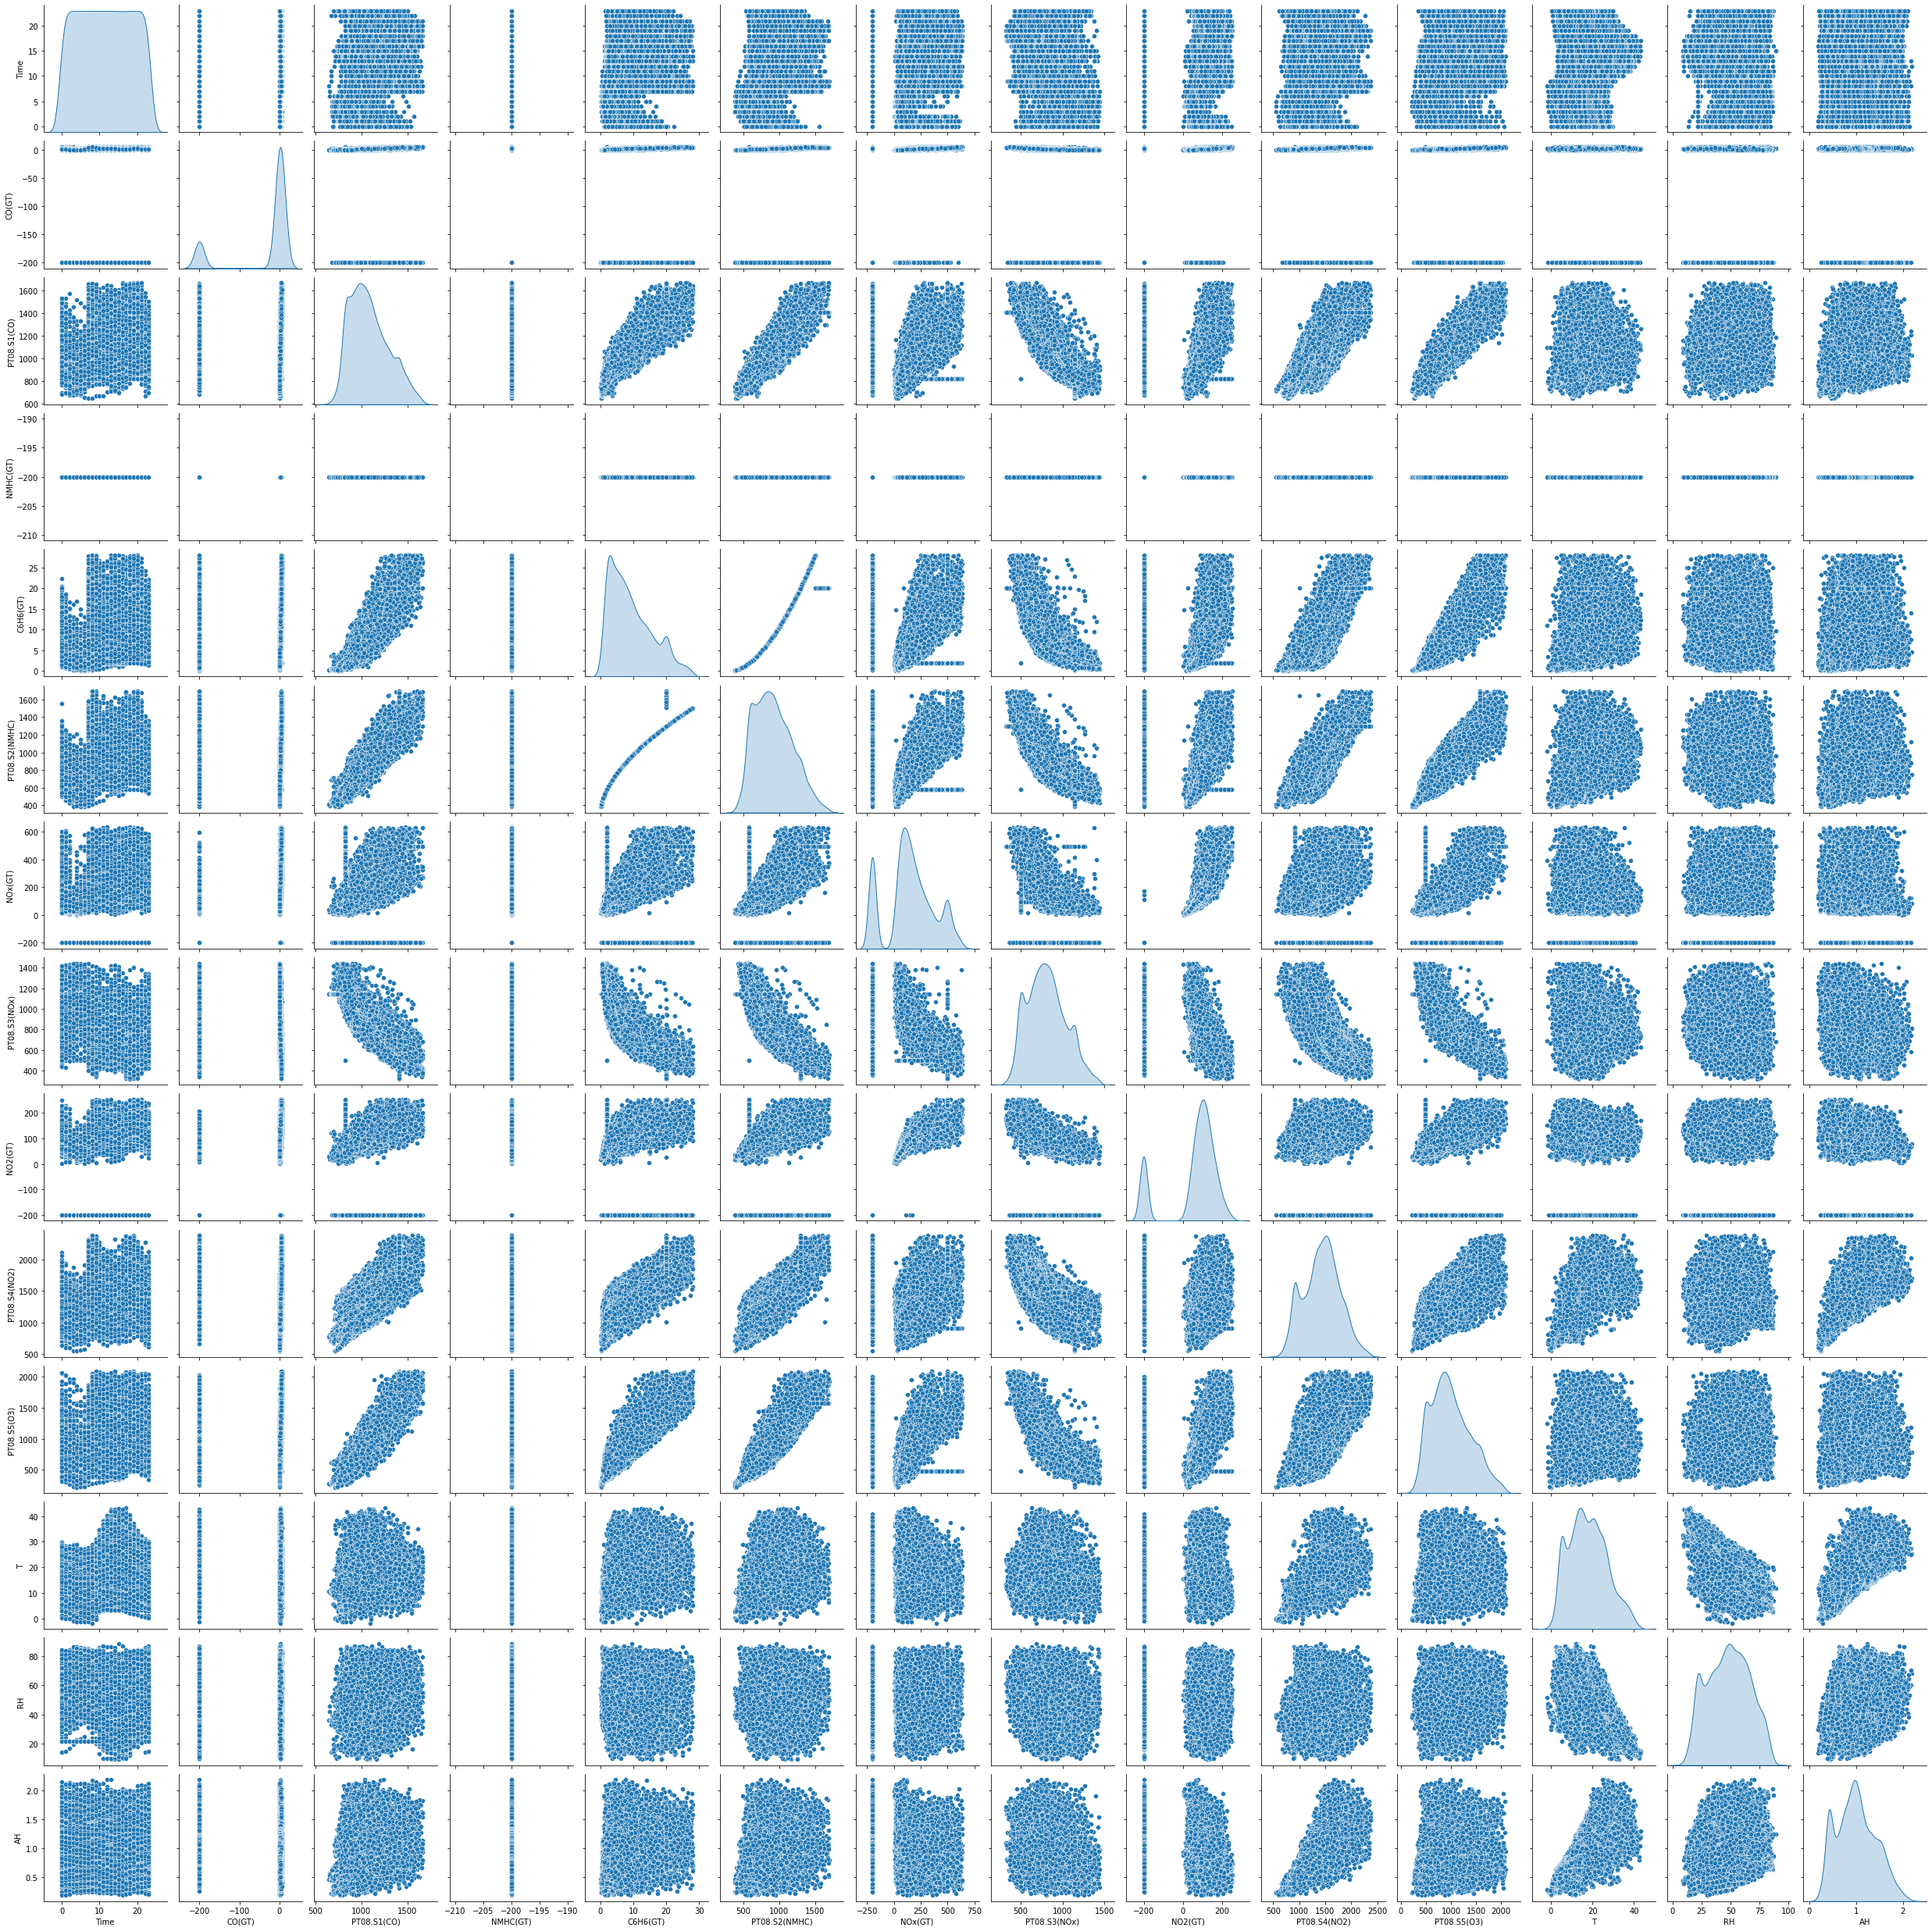

In [18]:
sns.pairplot(df_aux, diag_kind='kde')

Impresión de las graficas de distribución de tiempo vs contaminantes

In [19]:
# Se extraen los nombres de las columnas de los contaminantes y las condiciones del abiente que influyen en la calidad del aire
columnNames = df_aux.columns[2::]
print(columnNames)

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')


Time vs. CO(GT). Correlacion: 0.07533172273484721


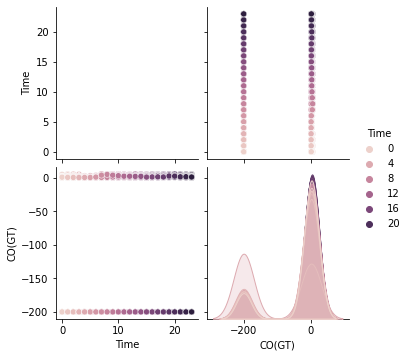

Time vs. PT08.S1(CO). Correlacion: 0.3083277928745455


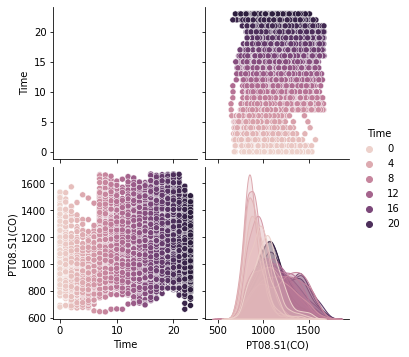

Time vs. NMHC(GT). Correlacion: nan


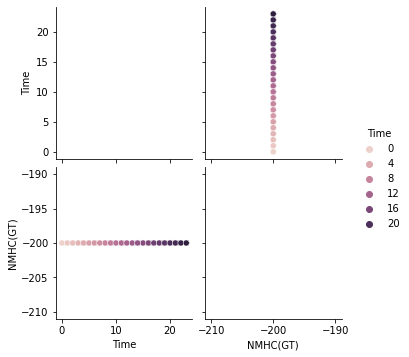

Time vs. C6H6(GT). Correlacion: 0.34518731389109253


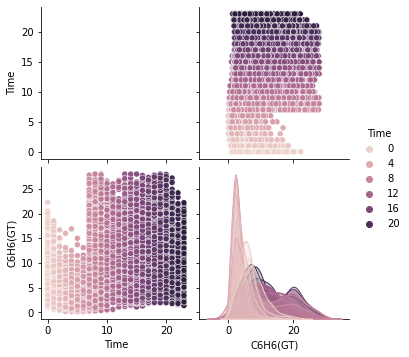

Time vs. PT08.S2(NMHC). Correlacion: 0.36758131505551933


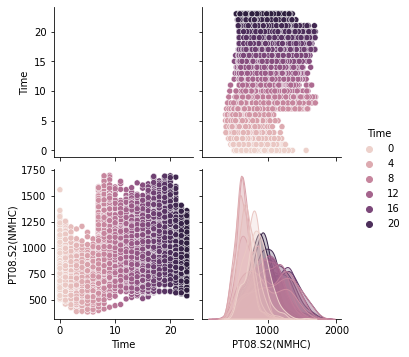

Time vs. NOx(GT). Correlacion: 0.2310034289109048


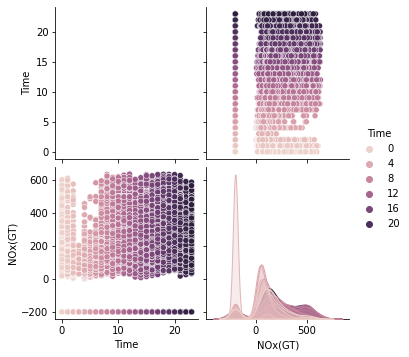

Time vs. PT08.S3(NOx). Correlacion: -0.31104844880922894


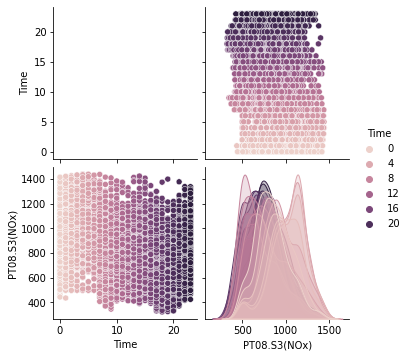

Time vs. NO2(GT). Correlacion: 0.2193905877951347


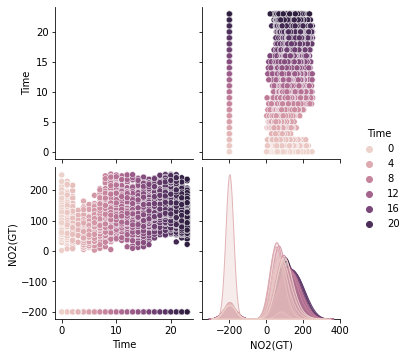

Time vs. PT08.S4(NO2). Correlacion: 0.2069502487600149


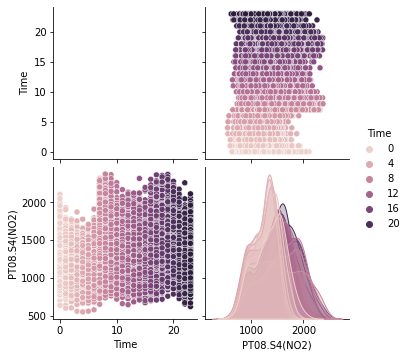

Time vs. PT08.S5(O3). Correlacion: 0.226064219292866


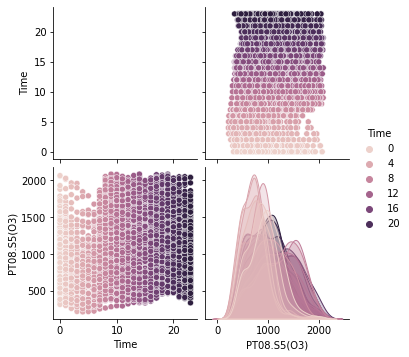

Time vs. T. Correlacion: 0.19018686977549784


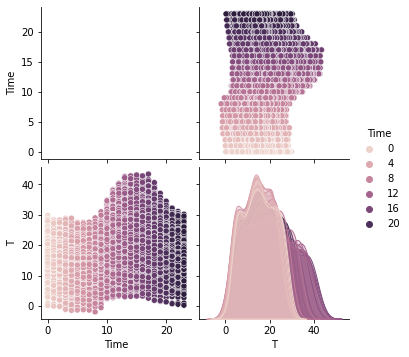

Time vs. RH. Correlacion: -0.28035654026197504


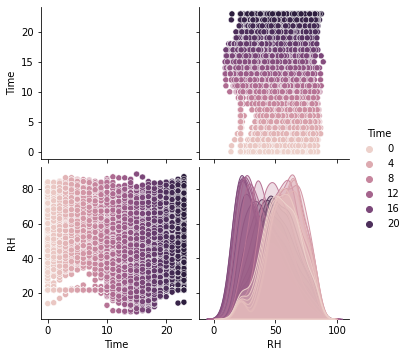

Time vs. AH. Correlacion: -0.02145761174074998


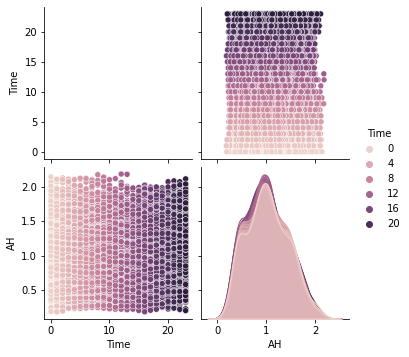

In [20]:
columnNames = df_aux.columns[2::]
for name in columnNames:
    label = df_aux[name]
    feature = df_aux['Time']
    correlation = label.corr(feature)
    print(f"Time vs. {name}. Correlacion: {label.corr(feature)}")
    sns.pairplot(df_aux, vars=['Time', name], hue = 'Time') # .set(title = f"Time vs. {name}")
    #plt.title(f"Time vs. {name}")
    plt.show()

Observaciones: Como se puede apreciar a partir de la matriz de correlaciones y los gráficos de dispersión de la relación entre el tiempo (horas) y la presencia de cada uno de los contaminantes existe una relación débil entre el comportamiento de estos en función de las horas.

Las relaciones más "fuertes" del tiempo con los contaminantes se dan con: PT08.S2(NMHC), C6H6(GT), PT08.S3(NOx) y PT08.S1(CO). Todas estas explican su comportamiento en un 30% con el tiempo.

En un segundo grupo, están las características cuyo comportamiento varía en función del tiempo con una probabilidad de menos del 30%, tales como: RH, NOx(GT), PT08.S5(O3), NO2(GT) y el PT08.S4(NO2). El comportamiento del resto de las características apenas se explica en relación con el tiempo en menos de 20%, por ende, no se consideran de relevancia para el modelo.

### Multicolinealidad

Para armar un modelo de regresión adecuado, se debe evitar la dependencia entre las características. Desafortunadamente, en este caso, la presencia de cualquier contaminante de la clase PT está fuertemente correlacionada con la presencia de otro contaminante. Por ejemplo, el contaminante PT08.S2(NMHC) está fuertemente correlacionado con el PT08.S1(CO), el PT08.S5(O3) y en ligera menor medida con PT08.S4(NO2) y PT08.S3(NOx), por ende, incluir a todos estos contaminantes en el modelo no sería lo más adecuado en tanto se requeríría mayor poder de cómputo y no se justificaría en una mejora del poder predictivo del modelo. Quizá se podría elegir tres o dos de estas características para formar parte del modelo, pero incluirlas todas no sería lo conveniente.

En el caso de la humedad relativa (RH), esta no presenta correlaciones fuertes con el resto de las características, por ende, se puede incorporar al modelo sin problemas. 

Respecto al contaminante NOx y NO2(GT), la única correlación fuerte que presentan es entre ellos. Por ende, se debe verificar si incoporar ambos al modelo mejora significativamente la precisión de este. En caso de no ser así, se recomendaría solo elegir uno de ellos.

### Modelo de regresión

Características a usar

Para seleccionar el número de variables adecuadas o que nos permita alcanzar el mejor nivel de precisión para nuestro modelo, se utilizará el método conocido como Selección hacia atrás. Este método comienza con un modelo que contiene todas las características disponibles y elimina gradualmente las menos importantes, evaluando el rendimiento del modelo después de cada eliminación. El proceso se repite hasta que se alcanza un umbral de rendimiento deseado (o el óptimo con las características disponibles) o hasta que se han eliminado todas las características menos importantes.

In [21]:
# Se define una función para generar el modelo de regresión
def regresionLineal(dataset, featuresNames, targetName, percentTest):
    # nombresCaracteristicas = ['PT08.S2(NMHC)', 'C6H6(GT)', 'PT08.S3(NOx)', 'PT08.S1(CO)', 'RH', 'NOx(GT)', 'PT08.S5(O3)', 'NO2(GT)', 'PT08.S4(NO2)']
    # Seleccionamos los conjutos X e Y
    X = dataset[featuresNames]
    y = df_aux[targetName]

    # Split data 70%-30% into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=percentTest, random_state=0)

    #print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

    # Ajustar un modelo de regresión lineal en el conjunto de entrenamiento
    model = LinearRegression().fit(X_train, y_train)

    # Calculo de predicciones
    predictions = model.predict(X_test)
    np.set_printoptions(precision = 3, suppress=True) # Imprimir los valores numéricos sin notacion científica

    #print('Predicted labels: ', np.round(predictions, decimals=3))
    #print('Actual labels   : ' ,np.array(y_test))

    # Datos del modelo
    coeficientes = model.coef_
    interseccion = model.intercept_

    # Evaluacion del modelo
    # Añadimos los valores obtenidos a una tabla para posteriormente hacer la comparación de modelos
    n = len(featuresNames)
    

    # Evaluación del modelo
    mse = mean_squared_error(y_test, predictions)
    #print("MSE: ", mse)

    rmse = np.sqrt(mse)
    #print("RMSE: ", rmse)

    r2 = r2_score(y_test, predictions)
    #print("R2: ", r2)

    return predictions, coeficientes, interseccion, n, mse, rmse, r2

In [22]:
numCaracteristicasList = []
caracteristicasModeloList = []
coeficientesList = []
interseccionList = []
mseList = []
rmseList = []
r2List = []

# El orden en que se eligieron las características obedece a aquellas variables que tienen la mayor correlacion el tiempo en primer lugar hasta llegar a aquellas con menor correlación con el tiempo
nombresCaracteristicas = ['PT08.S2(NMHC)', 'C6H6(GT)', 'PT08.S3(NOx)', 'PT08.S1(CO)', 'RH', 'NOx(GT)', 'PT08.S5(O3)', 'NO2(GT)', 'PT08.S4(NO2)']
numeroCaracteristicas = len(nombresCaracteristicas)

for num in range(numeroCaracteristicas):
    if num == 0:
        featuresNames = nombresCaracteristicas
        predictions, coeficientes, interseccion, n, mse, rmse, r2 = regresionLineal(df_aux, featuresNames, 'Time', 0.30)
    else:
        featuresNames = nombresCaracteristicas[:(-1)*num]
        predictions, coeficientes, interseccion, n, mse, rmse, r2 = regresionLineal(df_aux, featuresNames, 'Time', 0.30)

    # Añadimos los valores obtenidos a una tabla para posteriormente hacer la comparación de modelos
    coeficientesList.append(coeficientes)
    interseccionList.append(interseccion)
    numCaracteristicasList.append(n)
    caracteristicasModeloList.append(featuresNames)
    mseList.append(mse)
    rmseList.append(rmse)
    r2List.append(r2)

resultados_dict = {"NumCaracteristicas": numCaracteristicasList,
                   "Caracteristicas" : caracteristicasModeloList,
                   "Coeficientes del modelo" : coeficientesList,
                   "Interseccion" : interseccionList,
                   "MSE" : mseList,
                   "RMSE" : rmseList,
                   "R2" : r2List}

resultados = pd.DataFrame(resultados_dict)
print(resultados)

   NumCaracteristicas                                    Caracteristicas  \
0                   9  [PT08.S2(NMHC), C6H6(GT), PT08.S3(NOx), PT08.S...   
1                   8  [PT08.S2(NMHC), C6H6(GT), PT08.S3(NOx), PT08.S...   
2                   7  [PT08.S2(NMHC), C6H6(GT), PT08.S3(NOx), PT08.S...   
3                   6  [PT08.S2(NMHC), C6H6(GT), PT08.S3(NOx), PT08.S...   
4                   5  [PT08.S2(NMHC), C6H6(GT), PT08.S3(NOx), PT08.S...   
5                   4  [PT08.S2(NMHC), C6H6(GT), PT08.S3(NOx), PT08.S...   
6                   3            [PT08.S2(NMHC), C6H6(GT), PT08.S3(NOx)]   
7                   2                          [PT08.S2(NMHC), C6H6(GT)]   
8                   1                                    [PT08.S2(NMHC)]   

                             Coeficientes del modelo  Interseccion        MSE  \
0  [0.025129716054800175, -0.3579455926586865, -0...      0.814041  35.087280   
1  [0.019440462751310467, -0.41323126403223875, -...      0.292104  35.497207

Observaciones:

Por lógica, al incluir más características en el modelo, el valor del MSE es menor, ya que el modelo es más preciso, en tanto, tiene más información para ajustarse a los datos muestrales. Lo mismo explica el índice RMSE cuando el número de características usadas para el modelo es mayor. En línea con los resultados anteriores, el coeficiente de determinación R2 aumenta conforme se tomen en cuenta más características del modelo.

A pesar de haber elegido casi todos los contaminantes y características ambientales que se consideraron de relevancia por el índice de correlación respecto al tiempo, vemos que la precisión del modelo lineal generado es muy baja. Su poder predictivo apenas llega al 30%. Por ende, se puede apreciar que los modelos lineales no son una buena función de ajuste a los datos muestrales, no solo por la naturaleza del modelo, sino porque las variables tienen muy poca relación con la variable target.


### Regresión Polinomial

In [23]:
# Se define una función para generar el modelo de regresión
def regresionPolinomial(dataset, featuresNames, targetName, percentTest):
    # nombresCaracteristicas = ['PT08.S2(NMHC)', 'C6H6(GT)', 'PT08.S3(NOx)', 'PT08.S1(CO)', 'RH', 'NOx(GT)', 'PT08.S5(O3)', 'NO2(GT)', 'PT08.S4(NO2)']
    # Seleccionamos los conjutos X e Y
    X = dataset[featuresNames]
    y = df_aux[targetName]

    pf = PolynomialFeatures(degree = 3)    # usaremos polinomios de grado 3
    X = pf.fit_transform(X)
    cols = pf.get_feature_names_out(featuresNames)
    #print(cols)

    # Split data 70%-30% into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=percentTest, random_state=0)

    #print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

    # Ajustar un modelo de regresión lineal en el conjunto de entrenamiento
    model = LinearRegression().fit(X_train, y_train)

    # Calculo de predicciones
    predictions = model.predict(X_test)
    np.set_printoptions(precision = 3, suppress=True) # Imprimir los valores numéricos sin notacion científica

    #print('Predicted labels: ', np.round(predictions, decimals=3))
    #print('Actual labels   : ' ,np.array(y_test))

    # Datos del modelo
    coeficientes = model.coef_
    interseccion = model.intercept_

    # Evaluacion del modelo
    # Añadimos los valores obtenidos a una tabla para posteriormente hacer la comparación de modelos
    n = len(featuresNames)
    

    # Evaluación del modelo
    mse = mean_squared_error(y_test, predictions)
    #print("MSE: ", mse)

    rmse = np.sqrt(mse)
    #print("RMSE: ", rmse)

    r2 = r2_score(y_test, predictions)
    #print("R2: ", r2)

    return predictions, len(coeficientes), interseccion, n, mse, rmse, r2

In [24]:
numCaracteristicasList = []
caracteristicasModeloList = []
coeficientesList = []
interseccionList = []
mseList = []
rmseList = []
r2List = []

# El orden en que se eligieron las características obedece a aquellas variables que tienen la mayor correlacion el tiempo en primer lugar hasta llegar a aquellas con menor correlación con el tiempo
nombresCaracteristicas = ['PT08.S2(NMHC)', 'C6H6(GT)', 'PT08.S3(NOx)', 'PT08.S1(CO)', 'RH', 'NOx(GT)', 'PT08.S5(O3)', 'NO2(GT)', 'PT08.S4(NO2)']
numeroCaracteristicas = len(nombresCaracteristicas)

for num in range(numeroCaracteristicas):
    if num == 0:
        featuresNames = nombresCaracteristicas
        predictions, coeficientes, interseccion, n, mse, rmse, r2 = regresionPolinomial(df_aux, featuresNames, 'Time', 0.30)
    else:
        featuresNames = nombresCaracteristicas[:(-1)*num]
        predictions, coeficientes, interseccion, n, mse, rmse, r2 = regresionPolinomial(df_aux, featuresNames, 'Time', 0.30)

    # Añadimos los valores obtenidos a una tabla para posteriormente hacer la comparación de modelos
    coeficientesList.append(coeficientes)
    interseccionList.append(interseccion)
    numCaracteristicasList.append(n)
    caracteristicasModeloList.append(featuresNames)
    mseList.append(mse)
    rmseList.append(rmse)
    r2List.append(r2)

resultados_dict = {"NumCaracteristicas": numCaracteristicasList,
                   "Caracteristicas" : caracteristicasModeloList,
                   "No. de coef. del modelo" : coeficientesList,
                   "Interseccion" : interseccionList,
                   "MSE" : mseList,
                   "RMSE" : rmseList,
                   "R2" : r2List}

resultados = pd.DataFrame(resultados_dict)
print(resultados)

   NumCaracteristicas                                    Caracteristicas  \
0                   9  [PT08.S2(NMHC), C6H6(GT), PT08.S3(NOx), PT08.S...   
1                   8  [PT08.S2(NMHC), C6H6(GT), PT08.S3(NOx), PT08.S...   
2                   7  [PT08.S2(NMHC), C6H6(GT), PT08.S3(NOx), PT08.S...   
3                   6  [PT08.S2(NMHC), C6H6(GT), PT08.S3(NOx), PT08.S...   
4                   5  [PT08.S2(NMHC), C6H6(GT), PT08.S3(NOx), PT08.S...   
5                   4  [PT08.S2(NMHC), C6H6(GT), PT08.S3(NOx), PT08.S...   
6                   3            [PT08.S2(NMHC), C6H6(GT), PT08.S3(NOx)]   
7                   2                          [PT08.S2(NMHC), C6H6(GT)]   
8                   1                                    [PT08.S2(NMHC)]   

   No. de coef. del modelo  Interseccion        MSE      RMSE        R2  
0                      220    431.059467  31.098844  5.576634  0.350686  
1                      165    304.902947  31.697361  5.630041  0.338190  
2                

Observaciones:

Podemos ver como en comparación con el modelo de regresión lineal, nuestro modelo se ajusta mejor a los datos, dándonos un mejor resultado R2 y teniendo un valor menor del MSE. Por lo que podemos decir que nuestra regresión polinomial encuentra ciertas relaciones que no se pueden ver en la regresión lineal. Sin embargo, aunque nuestro resultado sea mejor que la regresión lineal, el valor de R2 sigue siendo demasiado bajo para considerar que puede arrojar buenos resultados.

### Conclusiones

Respondiendo a la pregunta inicial, la contaminación del aire es más alta a las 19 horas. Si se observa a detalle la distribución individual de contaminantes el resto de las horas, se puede ver que a las 8 horas se presenta un comportamiento similar. Esto lo podemos relacionar con la salida de casa y el regreso de la gente que sale a trabajar, ya que en esas horas es cuando el tráfico y el flujo de gente es mayor.

Para obtener este resultado, primero verificamos la existencia de valores nulos, lo cual nos devuelve que existe una cantidad fija de nulos en todas las columnas, por lo que procedimos a eliminar esas filas, del mismo modo, las últimas dos columnas que estaban vacías fueron eliminadas. A continuación, se observó que había valores outliers, por lo que aplicamos el método de reemplazar por el primer percentil y el noveno percentil.

Finalmente, con base en los índices de correlación, se seleccionaron las características idóneas para construir modelos lineales y polinomiales, y se observaron que los resultados son bastante bajos para ambos tipos de regresión, por lo que no se pueden usar de forma confiable para predecir nuevos valores.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a80102d9-a5df-4d04-b628-19b2cede6501' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>